# Simple NN to calc logic function

In [74]:
from keras import models
from keras import layers

In [110]:
nw = models.Sequential()

In [111]:
nw.add(layers.Dense(4, activation='relu', input_shape=(2,)))
nw.add(layers.Dense(1, activation='sigmoid'))

In [112]:
nw.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [113]:
import numpy
v = list()
for i in range(1000):
    v.append([0, 0, 0])
    v.append([0, 1, 1])
    v.append([1, 0, 1])
    v.append([1, 1, 0])

In [114]:
import pandas
import numpy

In [115]:
df = pandas.DataFrame(v, columns=['x1', 'x2', 'y'])

In [116]:
train = df[:3000]
val = df[3000:3500]
test = df[3500:]

In [123]:
history = nw.fit(train[['x1', 'x2']], train['y'], epochs=30, batch_size=4, validation_data=(val[['x1', 'x2']], val['y']))

Train on 3000 samples, validate on 500 samples
Epoch 1/30
3000/3000 [==============================] - 2s 720us/step - loss: 0.0532 - accuracy: 1.0000 - val_loss: 0.0381 - val_accuracy: 1.0000
Epoch 2/30
3000/3000 [==============================] - 3s 857us/step - loss: 0.0281 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 3/30
3000/3000 [==============================] - 3s 890us/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 4/30
3000/3000 [==============================] - 2s 675us/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 5/30
3000/3000 [==============================] - 2s 670us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/30
3000/3000 [==============================] - 3s 946us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 7/30
3000/3000 [==============================] - 3s 997us/step - loss:

In [124]:
import matplotlib.pyplot as plt

In [125]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [126]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)

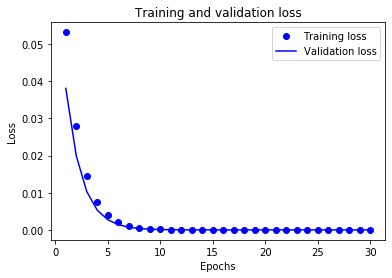

In [127]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

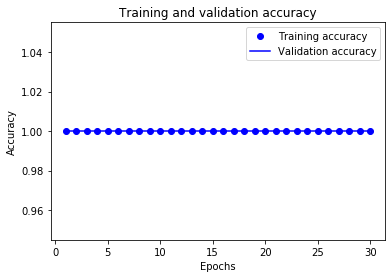

In [128]:
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [129]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [130]:
history = model.fit(train[['x1', 'x2']], train['y'], epochs=10, batch_size=4, validation_data=(val[['x1', 'x2']], val['y']))

Train on 3000 samples, validate on 500 samples
Epoch 1/10
3000/3000 [==============================] - 1s 314us/step - loss: 0.6130 - accuracy: 0.6960 - val_loss: 0.5473 - val_accuracy: 1.0000
Epoch 2/10
3000/3000 [==============================] - 1s 425us/step - loss: 0.4874 - accuracy: 1.0000 - val_loss: 0.4289 - val_accuracy: 1.0000
Epoch 3/10
3000/3000 [==============================] - 2s 608us/step - loss: 0.3700 - accuracy: 1.0000 - val_loss: 0.3094 - val_accuracy: 1.0000
Epoch 4/10
3000/3000 [==============================] - 2s 599us/step - loss: 0.2482 - accuracy: 1.0000 - val_loss: 0.1927 - val_accuracy: 1.0000
Epoch 5/10
3000/3000 [==============================] - 2s 509us/step - loss: 0.1472 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 1.0000
Epoch 6/10
3000/3000 [==============================] - 2s 511us/step - loss: 0.0826 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 1.0000
Epoch 7/10
3000/3000 [==============================] - 2s 716us/step - loss:

In [131]:
model.evaluate(test[['x1', 'x2']], test['y'])

500/500 [==============================] - 0s 31us/step


[0.007017825730144978, 1.0]

In [132]:
pred_y = model.predict(test[['x1', 'x2']])

In [159]:
test['y'].subtract(numpy.round(pred_y, 0).reshape(1, 500)[0]).sum()

0.0

In [161]:
model.save('nn_model_xor.h5')

In [162]:
df.to_csv('xor_df.csv', header=True, sep=',')